In [52]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
shunt_pxi_csv_path = '../data/shunt_pxi.csv'
shunt_pxi_df: pd.DataFrame = pd.read_csv(shunt_pxi_csv_path, sep=',', header=0, dtype={'keithley_195A_mV': np.float64})
shunt_pxi_df.head()

,spd3303c_current_A,psx_4110_mA,keithley_195A_mV
0,0.1,100.90,4.29
1,0.2,198.80,8.45
2,0.3,296.30,12.60
3,0.4,402.25,17.02
4,0.5,498.70,21.09


In [54]:
shunt_pxi_df.rename(columns={'spd3303c_current_A':'psu_current', 'psx_4110_mA': 'pxi_current', 'keithley_195A_mV': 'voltage' }, inplace=True)
shunt_pxi_df.head()

,psu_current,pxi_current,voltage
0,0.1,100.90,4.29
1,0.2,198.80,8.45
2,0.3,296.30,12.60
3,0.4,402.25,17.02
4,0.5,498.70,21.09


Text(0, 0.5, 'Voltage (mV)')

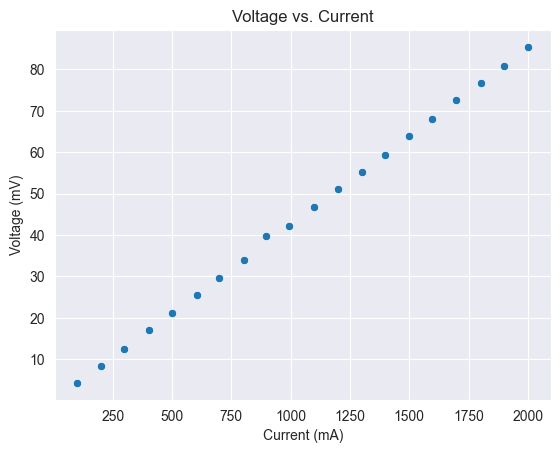

In [55]:
import seaborn as sns
ax = sns.scatterplot(x="pxi_current", y="voltage", data=shunt_pxi_df)
ax.set_title("Voltage vs. Current")
ax.set_xlabel("Current (mA)")
ax.set_ylabel("Voltage (mV)")

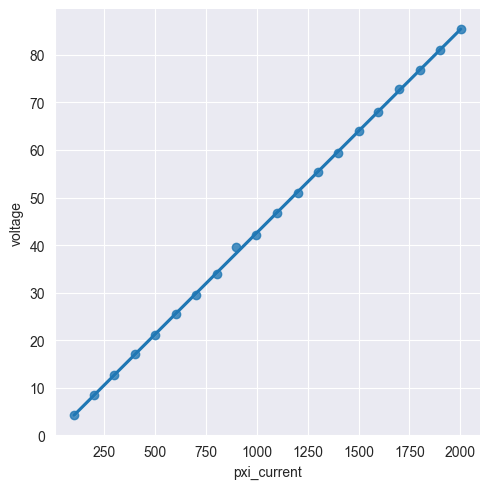

In [56]:
sns.lmplot(x="pxi_current", y="voltage", data=shunt_pxi_df)

In [57]:
stats.pearsonr(shunt_pxi_df['voltage'], shunt_pxi_df['pxi_current'])

PearsonRResult(statistic=np.float64(0.9998817997557234), pvalue=np.float64(4.274896006038433e-34))

In [58]:
cormat = shunt_pxi_df.corr()
round(cormat,2)

,psu_current,pxi_current,voltage
psu_current,1.0,1.0,1.0
pxi_current,1.0,1.0,1.0
voltage,1.0,1.0,1.0


In [59]:
Y = shunt_pxi_df['voltage']
X = shunt_pxi_df['pxi_current']
# X = sm.add_constant(X)
X.head()

0    100.90
1    198.80
2    296.30
3    402.25
4    498.70
Name: pxi_current, dtype: float64

In [60]:
model = sm.OLS(Y, X, missing='drop')
model_result = model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                voltage   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.445e+05
Date:                Sun, 25 Aug 2024   Prob (F-statistic):                    6.34e-42
Time:                        06:08:37   Log-Likelihood:                         -8.9829
No. Observations:                  20   AIC:                                      19.97
Df Residuals:                      19   BIC:                                      20.96
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
pxi_current     0.0426   7.27e-05    586.917      0.000       0.042       0.043
==============================================================================
Omnibus:                       43.259   Durbin-Watson:                   2.320
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.360
Skew:                           3.443   Prob(JB):                     1.65e-32
Kurtosis:                      14.323   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
model =  smf.ols(' voltage ~ pxi_current - 1', data=shunt_pxi_df)
model_result = model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                voltage   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.445e+05
Date:                Sun, 25 Aug 2024   Prob (F-statistic):                    6.34e-42
Time:                        07:16:05   Log-Likelihood:                         -8.9829
No. Observations:                  20   AIC:                                      19.97
Df Residuals:                      19   BIC:                                      20.96
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
pxi_current     0.0426   7.27e-05    586.917      0.000       0.042       0.043
==============================================================================
Omnibus:                       43.259   Durbin-Watson:                   2.320
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.360
Skew:                           3.443   Prob(JB):                     1.65e-32
Kurtosis:                      14.323   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: ylabel='Count'>

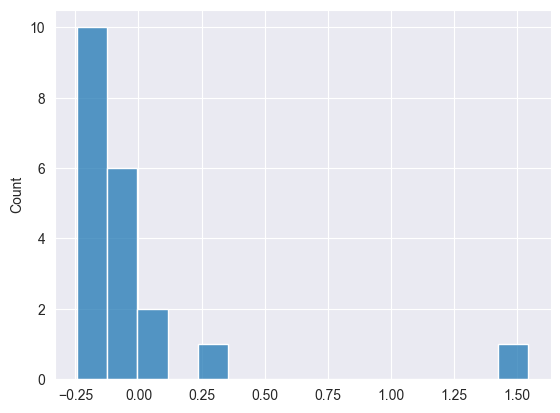

In [62]:
sns.histplot(model_result.resid)

In [63]:
mu, std = stats.norm.fit(model_result.resid)
mu, std

(np.float64(-0.011769355689686822), np.float64(0.37897933227726155))

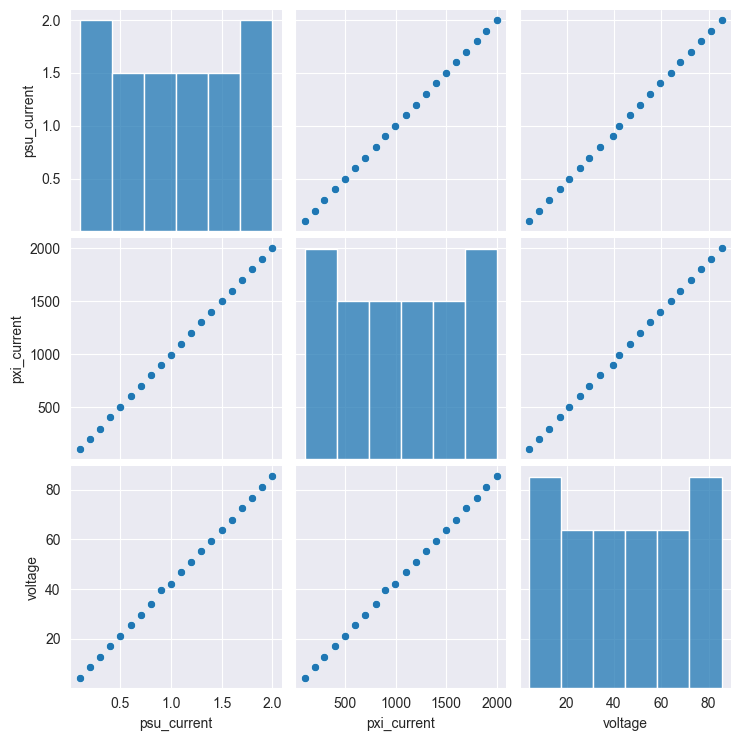

In [64]:
sns.pairplot(shunt_pxi_df);

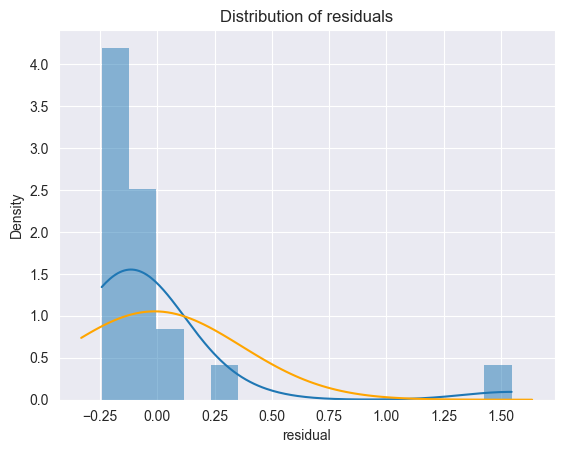

In [65]:
fig, ax = plt.subplots()
# plot the residuals
sns.histplot(x=model_result.resid, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

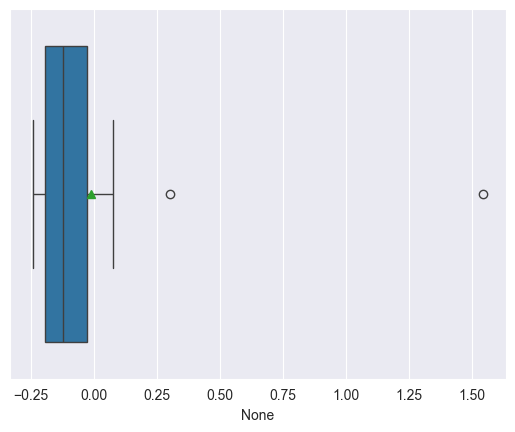

In [66]:
sns.boxplot(x=model_result.resid, showmeans=True);

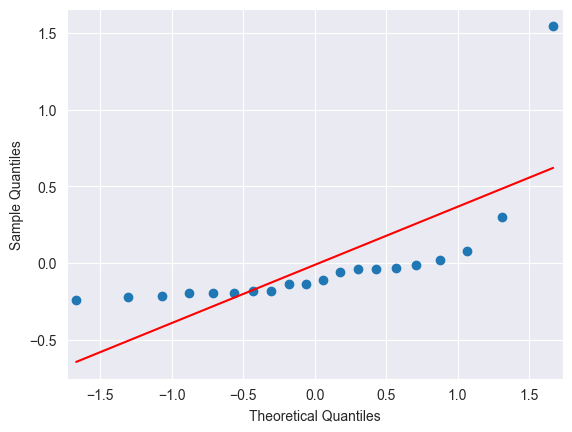

In [71]:
sm.qqplot(model_result.resid, line='s');

In [45]:
model_result.fittedvalues

0      4.303315
1      8.478682
2     12.636989
3     17.155683
4     21.269208
5     25.731605
6     29.802481
7     34.183418
8     38.154068
9     42.412601
10    46.897175
11    51.234610
12    55.465421
13    59.553357
14    63.987605
15    68.068290
16    72.429182
17    76.798603
18    80.939850
19    85.373246
dtype: float64

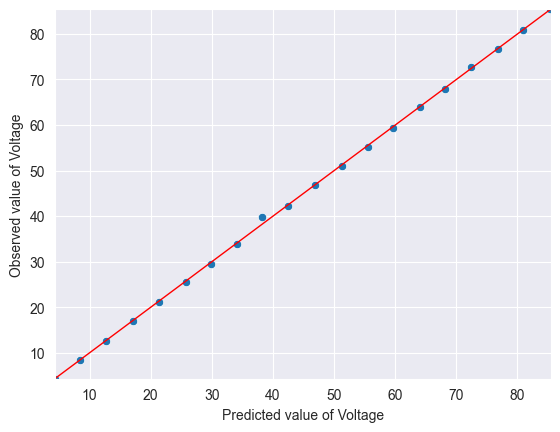

In [69]:
Y_max = Y.max()
Y_min = Y.min()

ax = sns.scatterplot(x=model_result.fittedvalues, y=Y)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Predicted value of Voltage")
ax.set_ylabel("Observed value of Voltage")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()